In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
stock = 'AAPL'  # Example: Apple stock
start_date = '2015-01-01'
end_date = '2023-12-31'

data = yf.download(stock, start=start_date, end=end_date)
data.to_csv('stock_data.csv')  # Save for backup
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.347166,24.817051,23.906231,24.805916,212818400
2015-01-05,23.661274,24.195741,23.474212,24.115571,257142000
2015-01-06,23.663496,23.924048,23.300503,23.725850,263188400
2015-01-07,23.995314,24.095525,23.761484,23.872831,160423600
2015-01-08,24.917269,24.975170,24.206873,24.324903,237458000


In [4]:
import pandas as pd

# Load the data, skipping the first two rows
data = pd.read_csv('stock_data.csv', skiprows=2)

# Rename the columns to appropriate labels
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check the first few rows to confirm
print(data.head())


                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.347166  24.817051  23.906231  24.805916  212818400
2015-01-05  23.661274  24.195741  23.474212  24.115571  257142000
2015-01-06  23.663496  23.924048  23.300503  23.725850  263188400
2015-01-07  23.995314  24.095525  23.761484  23.872831  160423600
2015-01-08  24.917269  24.975170  24.206873  24.324903  237458000


In [5]:
# Reset the index so "Date" is a column, not an index
data_reset = data.reset_index()

# Display the table with "Date" as a column
data_reset.head()


,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.347166,24.817051,23.906231,24.805916,212818400
1,2015-01-05,23.661274,24.195741,23.474212,24.115571,257142000
2,2015-01-06,23.663496,23.924048,23.300503,23.725850,263188400
3,2015-01-07,23.995314,24.095525,23.761484,23.872831,160423600
4,2015-01-08,24.917269,24.975170,24.206873,24.324903,237458000


In [6]:
# Check for missing data
print(data.isnull().sum())

# Fill missing data (if any) with the mean of the column
data = data.fillna(data.mean())


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Scale the features (Close, High, Low, Open, Volume)
scaled_data = scaler.fit_transform(data[['Close', 'High', 'Low', 'Open', 'Volume']])

# Create a new dataframe with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close', 'High', 'Low', 'Open', 'Volume'], index=data.index)


In [8]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = scaled_data_df[['High', 'Low', 'Open', 'Volume']]  # Features
y = scaled_data_df['Close']  # Target variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (1811, 4), Testing data shape: (453, 4)


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features (Open, High, Low, Volume) for both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
lr_predictions = lr_model.predict(X_test)

# Evaluate the model (optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.838603324098083e-05
R-squared: 0.9974385557906


In [11]:
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshaping the data to fit LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layers
lstm_model.add(LSTM(units=100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  # Output layer for prediction

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Fit the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

# Evaluate the model (optional)
mse_lstm = mean_squared_error(y_test, lstm_predictions)
r2_lstm = r2_score(y_test, lstm_predictions)

print(f'LSTM Mean Squared Error: {mse_lstm}')
print(f'LSTM R-squared: {r2_lstm}')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0657 - mean_absolute_error: 0.1666 - mean_squared_error: 0.0657 - val_loss: 0.0393 - val_mean_absolute_error: 0.1750 - val_mean_squared_error: 0.0393
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mean_absolute_error: 0.0448 - mean_squared_error: 0.0036 - val_loss: 0.0030 - val_mean_absolute_error: 0.0426 - val_mean_squared_error: 0.0030
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - mean_absolute_error: 0.0285 - mean_squared_error: 0.0016 - val_loss: 6.7887e-04 - val_mean_absolute_error: 0.0206 - val_mean_squared_error: 6.7887e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0228 - mean_squared_error: 0.0012 - val_loss: 5.1097e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 5.1097e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0216 - mean_squared_error: 0.0011 - val_loss: 4.2492e-04 - val_me

In [13]:
# Fit the scaler only on the target variable (stock prices - 'Close')
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Scale the features as before (with the previous scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Assuming lstm_predictions is the model's predictions for the test data
lstm_predictions_rescaled = target_scaler.inverse_transform(lstm_predictions.reshape(-1, 1))  # Rescale the predictions
y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Rescale the actual value

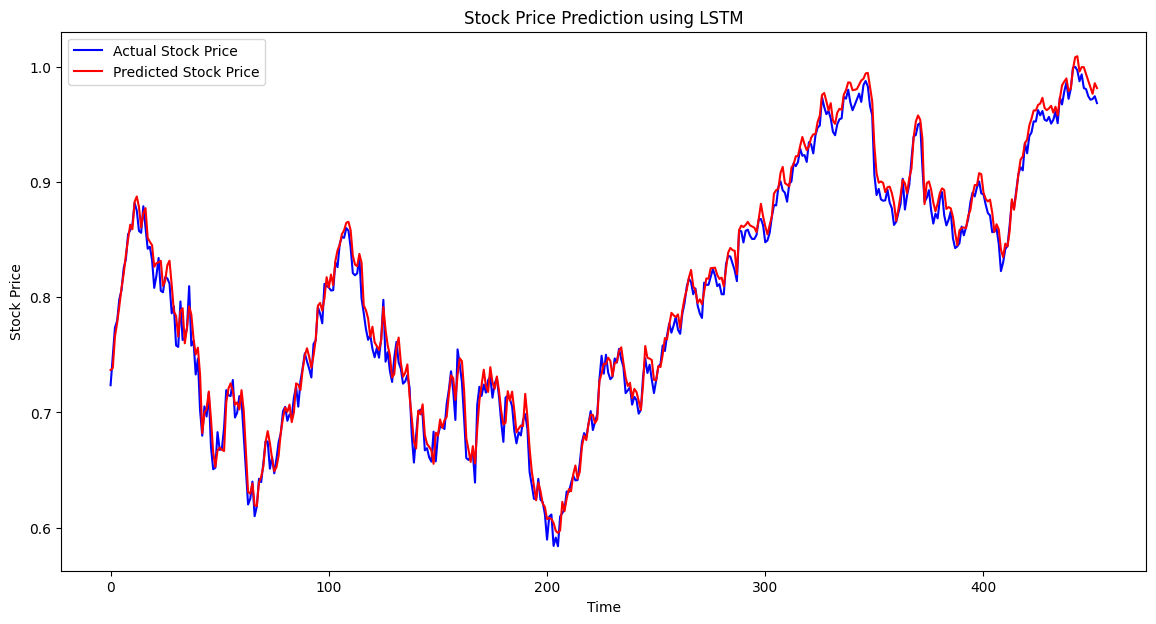

Mean Absolute Percentage Error (MAPE): 0.0111


In [15]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14,7))
plt.plot(y_test_rescaled, label='Actual Stock Price', color='blue')  # Actual values
plt.plot(lstm_predictions_rescaled, label='Predicted Stock Price', color='red')  # Predicted values
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_rescaled, lstm_predictions_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")


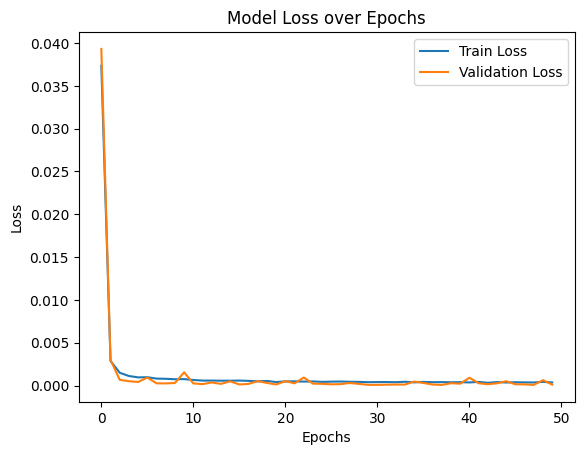

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
import joblib

# Assuming your Linear Regression model is named lr_model
joblib.dump(lr_model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [18]:
# Assuming your LSTM model is named lstm_model
lstm_model.save('my_model.keras')


In [19]:
pip install Flask scikit-learn tensorflow numpy pandas


In [20]:
!pip install pyngrok


In [21]:
!pip install flask scikit-learn tensorflow pyngrok matplotlib


In [22]:
import os

# Create 'templates' directory if it doesn't exist
os.makedirs("templates", exist_ok=True)


In [23]:
index_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Stock Price Prediction</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 0;
            padding: 0;
        }
        form {
            margin: 20px auto;
            width: 300px;
            text-align: left;
        }
        input, button {
            width: 100%;
            margin: 5px 0;
            padding: 10px;
            font-size: 16px;
        }
        button {
            width: auto;
            display: block;
            margin: 20px auto;
        }
        canvas {
            max-width: 600px;
            margin: 20px auto;
        }
        #goBack {
            width: auto;
            padding: 10px 20px;
            font-size: 16px;
            cursor: pointer;
            background-color: #e74c3c;
            color: #fff;
            border: none;
            border-radius: 5px;
            margin: 20px auto;
            display: block;
        }
        #goBack:hover {
            background-color: #c0392b;
        }
    </style>
</head>
<body>
    <h1>Stock Price Prediction</h1>
    <form id="predictionForm">
        <input type="date" name="date" placeholder="Date" required>
        <input type="number" step="0.01" name="close" placeholder="Close Price" required>
        <input type="number" step="0.01" name="high" placeholder="High Price" required>
        <input type="number" step="0.01" name="low" placeholder="Low Price" required>
        <input type="number" step="0.01" name="open" placeholder="Open Price" required>
        <input type="number" step="0.01" name="volume" placeholder="Volume" required>
        <button type="submit">Predict</button>
    </form>

    <h2>Price Breakdown</h2>
    <canvas id="predictionPieChart"></canvas>
    <canvas id="predictionBarChart"></canvas>

    <button id="goBack">Go Back</button>

    <script>
        const form = document.getElementById('predictionForm');
        const pieCtx = document.getElementById('predictionPieChart').getContext('2d');
        const barCtx = document.getElementById('predictionBarChart').getContext('2d');
        const goBack = document.getElementById('goBack');
        let pieChart, barChart;

        goBack.addEventListener('click', () => {
            if (window.history.length > 1) {
                window.history.back();
            } else {
                window.location.href = '/';
            }
        });

        form.addEventListener('submit', async (event) => {
            event.preventDefault();

            const data = {
                date: form.date.value,
                close: parseFloat(form.close.value),
                high: parseFloat(form.high.value),
                low: parseFloat(form.low.value),
                open: parseFloat(form.open.value),
                volume: parseFloat(form.volume.value)
            };

            try {
                const response = await fetch('/predict', {
                    method: 'POST',
                    headers: {
                        'Content-Type': 'application/json'
                    },
                    body: JSON.stringify(data)
                });

                if (!response.ok) {
                    const error = await response.json();
                    alert(`Error: ${error.error}`);
                    return;
                }

                const result = await response.json();

                const labels = [
                    'Predicted LR Price',
                    'Actual LR Price',
                    'Predicted LSTM Price',
                    'Actual LSTM Price'
                ];
                const dataValues = [
                    result.lr_prediction,
                    result.actual_lr_price,
                    result.lstm_prediction,
                    result.actual_lstm_price
                ];
                const colors = ['#1abc9c', '#3498db', '#9b59b6', '#e74c3c'];

                if (pieChart) pieChart.destroy();
                pieChart = new Chart(pieCtx, {
                    type: 'pie',
                    data: {
                        labels: labels,
                        datasets: [{
                            data: dataValues,
                            backgroundColor: colors
                        }]
                    },
                    options: {
                        responsive: true,
                        plugins: {
                            legend: {
                                position: 'top'
                            },
                            tooltip: {
                                callbacks: {
                                    label: function (tooltipItem) {
                                        return `$${tooltipItem.raw.toFixed(2)}`;
                                    }
                                }
                            }
                        }
                    }
                });

                if (barChart) barChart.destroy();
                barChart = new Chart(barCtx, {
                    type: 'bar',
                    data: {
                        labels: labels,
                        datasets: [{
                            data: dataValues,
                            backgroundColor: colors,
                            barThickness: 50
                        }]
                    },
                    options: {
                        responsive: true,
                        plugins: {
                            legend: {
                                display: false
                            },
                            tooltip: {
                                callbacks: {
                                    label: function (tooltipItem) {
                                        return `$${tooltipItem.raw.toFixed(2)}`;
                                    }
                                }
                            }
                        },
                        scales: {
                            x: {
                                title: {
                                    display: true,
                                    text: 'Prediction Categories (LR & LSTM)'
                                },
                                ticks: {
                                    display: false // Remove labels below bars
                                }
                            },
                            y: {
                                title: {
                                    display: true,
                                    text: 'Price Value (USD)',
                                    padding: { top: 10, bottom: 10 } // Prevent cutoff
                                },
                                beginAtZero: true
                            }
                        }
                    }
                });
            } catch (error) {
                console.error('Error:', error);
                alert('An error occurred while processing your request.');
            }
        });
    </script>
</body>
</html>
"""

with open("templates/index.html", "w") as file:
    file.write(index_html)


In [24]:
!ls templates


index.html


In [25]:
pip install --upgrade pyngrok


In [ ]:
from flask import Flask, render_template, request, jsonify
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pyngrok import ngrok
import yfinance as yf  # Import yfinance to fetch real stock prices

# Initialize the Flask app
app = Flask(__name__)

# Load the saved models
lr_model = joblib.load('linear_regression_model.pkl')  # Ensure correct path
lstm_model = load_model('my_model.keras')  # Ensure correct path

# Initialize scalers (must be fitted with training data)
scaler = StandardScaler()
target_scaler = MinMaxScaler()

# Replace with actual training data used to train models
training_data = np.array([[100, 95, 97, 1000], [101, 96, 98, 1050]])  # Example data
scaler.fit(training_data)
target_scaler.fit(np.array([[100], [105]]))  # Example target data

# Function to fetch actual stock price from Yahoo Finance
def get_actual_price(symbol):
    stock = yf.Ticker(symbol)
    hist = stock.history(period="1d")  # Fetch the latest data for today
    return hist['Close'].iloc[0]  # Returns the closing price of the most recent day

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Parse JSON input from the request
        data = request.get_json()

        # Extract individual values
        high = float(data['high'])
        low = float(data['low'])
        open_price = float(data['open'])
        volume = float(data['volume'])

        # Prepare input data
        input_data = np.array([[high, low, open_price, volume]])
        scaled_input = scaler.transform(input_data)

        # Make predictions
        lr_prediction = lr_model.predict(scaled_input)
        lstm_input = scaled_input.reshape((scaled_input.shape[0], 1, scaled_input.shape[1]))
        lstm_prediction = lstm_model.predict(lstm_input)

        # Rescale predictions
        lr_prediction_rescaled = target_scaler.inverse_transform(lr_prediction.reshape(-1, 1))
        lstm_prediction_rescaled = target_scaler.inverse_transform(lstm_prediction.reshape(-1, 1))

        # Fetch actual prices using yfinance (replace with appropriate stock symbols)
        actual_lr_price = get_actual_price("AAPL")  # Example: Apple stock
        actual_lstm_price = get_actual_price("GOOGL")  # Example: Google stock

        # Return JSON response for frontend
        return jsonify({
            'lr_prediction': float(lr_prediction_rescaled[0][0]),
            'actual_lr_price': actual_lr_price,
            'lstm_prediction': float(lstm_prediction_rescaled[0][0]),
            'actual_lstm_price': actual_lstm_price
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == "__main__":
    ngrok.set_auth_token("2rt5L03UtaVeBd6H3jtAL03eB5A_83J2h8Fb7z8kFxL4cmkWx")  # Replace with your Ngrok token
    public_url = ngrok.connect(5000)
    print(f" * Flask app running on {public_url}")
    app.run(port=5000)


 * Flask app running on NgrokTunnel: "https://f7b1-34-73-253-204.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [27/Jan/2025 10:30:54] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Jan/2025 10:30:54] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


INFO:werkzeug:127.0.0.1 - - [27/Jan/2025 10:31:07] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Jan/2025 10:31:28] "GET / HTTP/1.1" 200 -
